## "Maximizing NYC Taxi Performance Through Data Analytics"


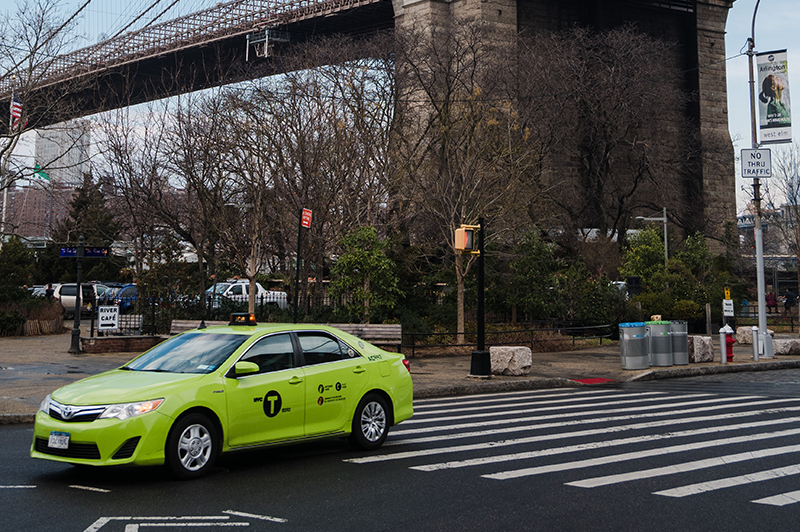

# Latar Belakang

Industri taksi di New York City (NYC) merupakan salah tulang punggung mobilitas masyarakat dan wisatawan. Namun, keterbatasan jumlah armada dan tingginya permintaan, terutama pada jam sibuk, menimbulkan tantangan dalam mendistribusikan taksi secara efisien. Persaingan dengan layanan transportasi berbasis aplikasi juga semakin ketat, baik dalam hal ketersediaan maupun kualitas layanan. Oleh karena itu, pendekatan berbasis data menjadi kunci untuk mempertahankan daya saing.

New York City Taxi and Limousine Commission (NYC TLC) adalah badan pemerintah yang mengatur industri taksi di kota New York. Badan ini bertanggungjawab untuk memberikan lisensi,menetapkan standar operasional, melakukan uji kelayakan pengemudi dan juga bertanggungjawab atas layanan konsumen. Sebagai regulator, NYC Taxi and Limousine Commission (NYC TLC) berkomitmen meningkatkan efisiensi armada dengan memanfaatkan analisis data perjalanan taksi. Data historis yang mencakup rute, waktu, dan lokasi di seluruh borough memungkinkan NYC TLC untuk mempelajari bagaimana menoptimalkan armada taxi berdasarkan lokasi dan waktu. 

TLC tidak secara langsung mengatur gaji atau tunjangan pengemudi, tetapi memiliki peran tidak langsung dalam memengaruhi kesejahteraan mereka melalui regulasi yang mempengaruhi pendapatan berupa penetapan tarif dasar dan penentuan komisi terhadap perusahaan.


# Pernyataan Masalah
1. **Optimasi Armada Taxi Berdasarkan Lokasi dan Waktu**:  Dengan menempatkan armada di area dan waktu yang tepat (misalnya, pusat kota saat jam sibuk), efisiensi layanan meningkat.

2. **Peningkatan Pendapatan Driver melalui Tip**: Tip menjadi sumber pendapatan tambahan yang signifikan, yang dapat mempengaruhi tingkat kesejahteraan driver taxi.


# Pembahasan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 40)

In [7]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [8]:
#Jumlah baris dan kolom pada dataset
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [9]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

Berikut adalah kolom pada dataset New York TLC:

* **VendorID** : A code indicating the LPEP provider that provided the record.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1 = Creative Mobile Technologies, LLC.
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 = VeriFone Inc.

* **lpep\_pickup\_datetime** : The date and time when the meter was engaged.

* **lpep\_dropoff\_datetime** : The date and time when the meter was disengaged.

* **Passenger\_count** : The number of passengers in the vehicle.
This is a driver-entered value.

* **Trip\_distance** : The elapsed trip distance in miles was reported by the taximeter.

* **PULocationID** : TLC Taxi Zone in which the taximeter was engaged.

* **DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged.

* **RateCodeID**: The final rate code is in effect at the end of the trip.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1 = Standard rate
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2 = JFK
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3 = Newark
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4 = Nassau or Westchester
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5 = Negotiated fare
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6 = Group ride

* **Store\_and\_fwd\_flag** : This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Y = store and forward trip
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;N = not a store and forward trip





Ada penambahan data lokasi dan borough dan zone untuk pick up dan drop off.

In [12]:
df_locations=pd.read_csv('taxi_zone_location.csv')
df_locations

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


* **LocationID** : A unique numeric identifier for each taxi zone or service area..

* **Borough** : The larger administrative district of NYC where the zone is located (Manhattan, Brooklyn, Queens, Bronx, Staten Island)

* **Zone** : The specific neighborhood or area name within the borough

* **service_zone** : Classification of the zone for service purposes

In [14]:
# Untuk PU
df= df.merge(df_locations, left_on='PULocationID', right_on='LocationID', how='left')
df= df.rename(columns={'Borough': 'PUBorough', 'Zone': 'PUZone', 'service_zone':'PUService_Zone'})
df= df.drop('LocationID', axis=1)

# Untuk DO
df= df.merge(df_locations, left_on='DOLocationID', right_on='LocationID', how='left')
df= df.rename(columns={'Borough': 'DOBorough', 'Zone': 'DOZone', 'service_zone':'DOService_Zone'})
df= df.drop('LocationID', axis=1)

In [15]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


## Data Duplicate

In [17]:
df.duplicated().sum()

0

Dataset tidak memiliki data yang duplikat

# Missing Values

In [20]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
PUBorough                  0.096759
PUZone                     0.197915
PUService_Zone             0.294674
DOBorough                  0.354781
DOZone                     0.624533
DOService_Zone             0.979314
dtype: float64

<Axes: >

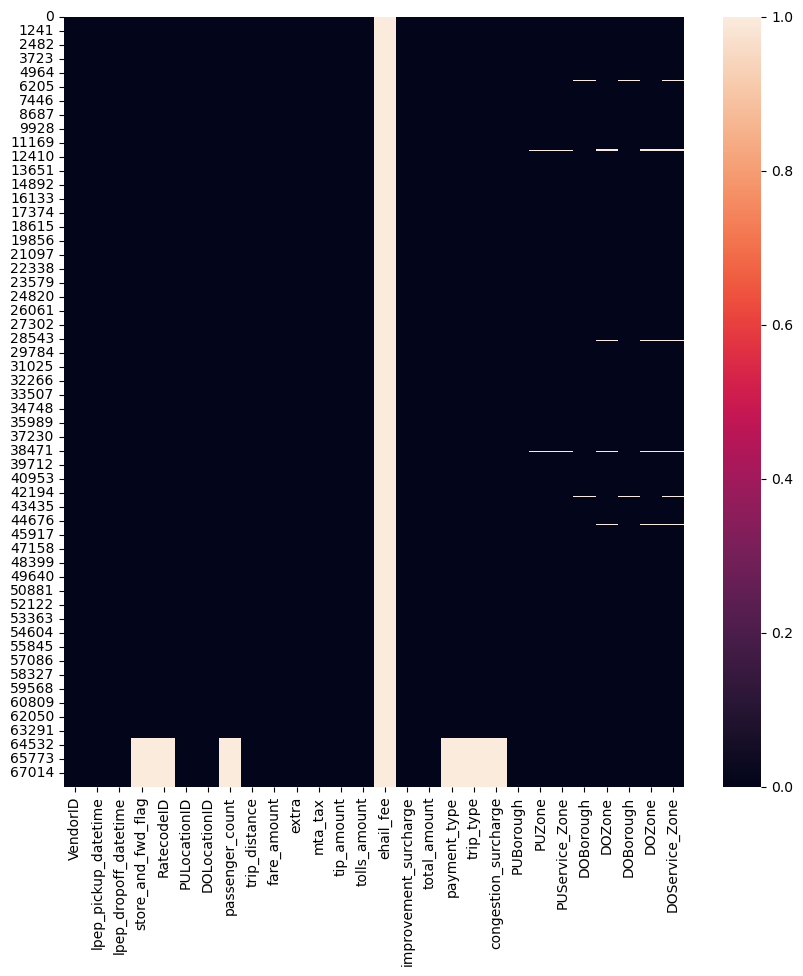

In [21]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge','PUBorough','PUZone','PUService_Zone','DOBorough','DOZone',
        'DOBorough','DOZone','DOService_Zone']].isna())

Secara garis besar:
* Missing value pada kolom `ehail_fee` memiliki proporsi sebesar 100%
* Missing value pada kolom `store_and_fwd_flag`,`RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge` proporsinya < 10%
* Msising value pada kolom `PUBorough`,`PUZone`,`PUService_Zone`,`DOBorough`,`DOZone`,`DOBorough`,`DOZone`,`DOService_Zone` proporsinya < 1%

Cara penanganan:
* Ehail fee merupakan biaya tambahan untuk setiap perjalanan yang dipesan secara elektronik (online). Kemungkinan penumpang tidak dikenakan ehail fee sehingga kolom ini kosong. Maka kolom ini akan dihapus dari dataset.
* Missing value secara bersamaan tidak ada dalam dataset, bisa jadi ada kesalahan driver ketika isi data. Maka data akan dihapus
* Missing value pada kolom-kolom lokasi ini menunjukkan zona/borough pick up dan drop off yang berada di luar wilayah New York City. Maka baris yang mengandung missing values ini akan dihapus

In [23]:
df.drop("ehail_fee", axis = 1,inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


In [24]:
#drop NaN Value
df.dropna(inplace=True)
df.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


# Handle Error per column

In [26]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'PUBorough',
       'PUZone', 'PUService_Zone', 'DOBorough', 'DOZone', 'DOService_Zone'],
      dtype='object')

# VendorID
(Data berupa integer dengan nilai 1 atau 2)

In [28]:
df['VendorID'].unique()

#Tidak ditemukan error pada column ini

array([2, 1], dtype=int64)

# lpep_pickup_datetime dan lpep_dropoff_datetime
<br> Sebelumnya type data masih berupa object ubah ke datetime

In [30]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

Rentang waktu data yang digunakan adalah selama bulan Januari 2023. Cek terlebih dahulu apakah ada data yang tidak sesuai

In [32]:
filtered_data = df[(df['lpep_pickup_datetime'] <= '2023-01-01 00:00:00') |
    (df['lpep_pickup_datetime'] >= '2023-01-31 23:59:59')]
filtered_data

#(Terdapat data yg 'lpep_pickup_datetime' bukan dalam Januari 2023. Maka data ini akan dihapus

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1.0,5.37,16.0,0.0,0.5,0.00,0.00,0.3,16.80,2.0,1.0,0.00,Queens,Astoria,Boro Zone,Queens,Corona,Boro Zone
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1.0,5.48,25.5,0.0,0.5,0.00,6.55,0.3,35.60,2.0,1.0,2.75,Queens,Woodside,Boro Zone,Manhattan,Midtown South,Yellow Zone
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1.0,65,178,1.0,7.72,34.5,0.0,0.5,7.20,0.00,1.0,43.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Ocean Parkway South,Boro Zone
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,N,5.0,82,198,2.0,4.58,28.0,0.0,0.0,5.66,0.00,0.3,33.96,1.0,2.0,0.00,Queens,Elmhurst,Boro Zone,Queens,Ridgewood,Boro Zone


In [33]:
df= df[(df['lpep_pickup_datetime'] >= '2023-01-01 00:00:00') &
    (df['lpep_pickup_datetime'] <= '2023-01-31 23:59:59')]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone


Setelah mengubah kedalam datatime dan hapus yang tidak sesuai dengan rentang waktu, Akan ada penambahan beberapa kolom baru untuk analisis selanjutnya:
1. Duration : durasi perjalanan ('lpep_dropoff_datetime'-'lpep_pickup_datetime')
2. Hari: Senin-Minggu (berdasarkan 'lpep_pickup_datetime')
3. Jam: 0-23 (berdasarkan 'lpep_pickup_datetime')
4. Weekend : True/False apakah 'lpep_pickup_datetime' hari weekend(True) atau weekdays(False)

In [35]:
df["duration"]=df["lpep_dropoff_datetime"]-df["lpep_pickup_datetime"]
df["duration"] = round(df['duration'].dt.total_seconds()/(60),2)
df['day'] = df['lpep_pickup_datetime'].dt.day_name()
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['is_weekend'] = df['lpep_pickup_datetime'].dt.dayofweek > 5
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,True
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,True
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,6.33,Sunday,0,True
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,True
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,5.97,Sunday,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,False
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,False
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,False
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,False


Selanjutnya untuk durasi perjalanan, jika ada yang bernilai <= 0 maka data akan dihapus

In [37]:
df[df['duration']<=0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend
7159,1,2023-01-05 07:54:34,2023-01-05 07:54:34,N,1.0,42,42,1.0,1.9,12.8,0.0,1.5,0.0,0.0,1.0,14.3,2.0,1.0,0.0,Manhattan,Central Harlem North,Boro Zone,Manhattan,Central Harlem North,Boro Zone,0.0,Thursday,7,False
16726,1,2023-01-09 17:00:08,2023-01-09 17:00:08,N,1.0,33,33,1.0,0.0,15.2,0.0,1.5,0.0,0.0,1.0,16.7,2.0,1.0,0.0,Brooklyn,Brooklyn Heights,Boro Zone,Brooklyn,Brooklyn Heights,Boro Zone,0.0,Monday,17,False
25514,1,2023-01-13 16:57:42,2023-01-13 16:57:42,N,1.0,49,49,1.0,0.0,18.5,0.0,1.5,0.0,0.0,1.0,20.0,1.0,1.0,0.0,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Clinton Hill,Boro Zone,0.0,Friday,16,False
42036,1,2023-01-21 17:09:25,2023-01-21 17:09:25,N,1.0,21,21,1.0,0.0,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,1.0,0.0,Brooklyn,Bensonhurst East,Boro Zone,Brooklyn,Bensonhurst East,Boro Zone,0.0,Saturday,17,False
52195,1,2023-01-26 12:47:11,2023-01-26 12:47:11,N,1.0,55,55,1.0,0.0,41.2,0.0,1.5,0.0,0.0,1.0,42.7,1.0,1.0,0.0,Brooklyn,Coney Island,Boro Zone,Brooklyn,Coney Island,Boro Zone,0.0,Thursday,12,False


In [38]:
df = df[(df['duration']>0)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,True
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,True
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,6.33,Sunday,0,True
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,True
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,5.97,Sunday,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,False
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,False
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,False
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,False


# store_and_fwd_flag

Data berisi Y atau N

In [40]:
df['store_and_fwd_flag'].unique()

#Tidak ditemukan error pada column ini

array(['N', 'Y'], dtype=object)

# RatecodeID

Data berisi nilai 1-6

In [42]:
df['RatecodeID'].unique()

#Tidak ditemukan error pada column ini

array([1., 5., 3., 2., 4.])

# passenger_count

In [44]:
df['passenger_count'].unique()

array([1., 2., 4., 3., 6., 5., 0., 8., 7., 9.])

Untuk kolom `passenger_count` terdapat data yang berisi 0. Untuk kolom ini biasanya diisi secara manual oleh driver, sehingga bisa terjadi kesalahan saat memasukkan data. Data ini akan diubah dengan menggunakan median (data skewed)

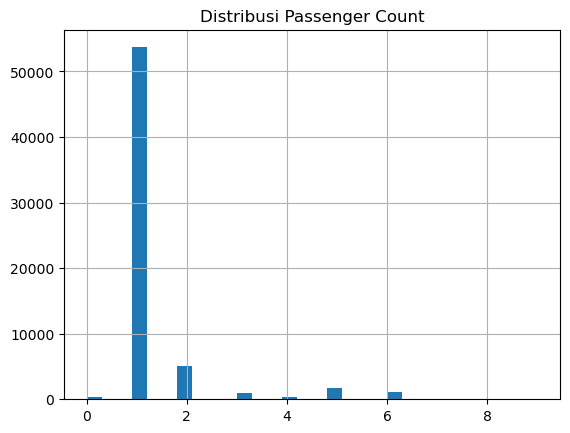

In [46]:
df['passenger_count'].hist(bins=30)
plt.title('Distribusi Passenger Count')
plt.show()

In [47]:
df["passenger_count"] = np.where(
    df["passenger_count"] == 0, 
    df["passenger_count"].quantile(0.5),
    df["passenger_count"]                 
)

In [48]:
df['passenger_count'].unique()

array([1., 2., 4., 3., 6., 5., 8., 7., 9.])

Untuk taxi di New York hanya bisa menampung maksimal 5-6 penumpang. Untuk penumpang lebih dari 6 akan dihapus, karena penumpang lebih dari 6 sangat jarang ditemukan.

In [50]:
df = df[(df['passenger_count']<=6)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,True
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,True
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,6.33,Sunday,0,True
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,True
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,5.97,Sunday,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,False
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,False
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,False
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,False


# Trip Distance

In [52]:
# hapus data dengan trip distance bernilai negatif
df = df[(df['trip_distance']>0)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,True
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,True
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,True
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,5.97,Sunday,0,True
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone,17.55,Sunday,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,False
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,False
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,False
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,False


# Kolom Biaya
('fare_amount', 'extra', 'mta_tax','tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge')

In [54]:
# memeriksa fare_amount yang bernilai negatif
negatif_fare_amount = df[df['fare_amount'] < 0]
negatif_fare_amount

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,0.43,Sunday,14,True
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone,7.82,Monday,2,False
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone,3.28,Monday,12,False
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone,1.15,Monday,13,False
2481,2,2023-01-02 19:03:48,2023-01-02 19:04:24,N,1.0,130,130,1.0,0.11,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,Queens,Jamaica,Boro Zone,Queens,Jamaica,Boro Zone,0.60,Monday,19,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60962,2,2023-01-30 15:57:52,2023-01-30 16:00:00,N,1.0,41,41,1.0,0.37,-4.4,-2.5,-0.5,0.0,0.0,-1.0,-8.4,4.0,1.0,0.0,Manhattan,Central Harlem,Boro Zone,Manhattan,Central Harlem,Boro Zone,2.13,Monday,15,False
61102,2,2023-01-30 17:17:09,2023-01-30 17:33:27,N,1.0,260,82,1.0,0.67,-14.2,-2.5,-0.5,0.0,0.0,-1.0,-18.2,3.0,1.0,0.0,Queens,Woodside,Boro Zone,Queens,Elmhurst,Boro Zone,16.30,Monday,17,False
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0,Queens,Jamaica,Boro Zone,Queens,Jamaica,Boro Zone,0.22,Tuesday,18,False
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone,0.47,Tuesday,19,False


In [55]:
# memeriksa apakah semua kolom yang berhubungan dengan fare amount juga bernilai negatif
fare_amount_check = negatif_fare_amount[
    (negatif_fare_amount['extra'] <= 0) & 
    (negatif_fare_amount['mta_tax'] <= 0) & 
    (negatif_fare_amount['tip_amount'] <= 0) & 
    (negatif_fare_amount['tolls_amount'] <= 0) & 
    (negatif_fare_amount['improvement_surcharge'] <= 0) & 
     (negatif_fare_amount['total_amount'] <= 0) &
    (negatif_fare_amount['congestion_surcharge'] <= 0)
]
fare_amount_check

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,0.43,Sunday,14,True
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone,7.82,Monday,2,False
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone,3.28,Monday,12,False
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone,1.15,Monday,13,False
2481,2,2023-01-02 19:03:48,2023-01-02 19:04:24,N,1.0,130,130,1.0,0.11,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0,Queens,Jamaica,Boro Zone,Queens,Jamaica,Boro Zone,0.60,Monday,19,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60962,2,2023-01-30 15:57:52,2023-01-30 16:00:00,N,1.0,41,41,1.0,0.37,-4.4,-2.5,-0.5,0.0,0.0,-1.0,-8.4,4.0,1.0,0.0,Manhattan,Central Harlem,Boro Zone,Manhattan,Central Harlem,Boro Zone,2.13,Monday,15,False
61102,2,2023-01-30 17:17:09,2023-01-30 17:33:27,N,1.0,260,82,1.0,0.67,-14.2,-2.5,-0.5,0.0,0.0,-1.0,-18.2,3.0,1.0,0.0,Queens,Woodside,Boro Zone,Queens,Elmhurst,Boro Zone,16.30,Monday,17,False
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0,Queens,Jamaica,Boro Zone,Queens,Jamaica,Boro Zone,0.22,Tuesday,18,False
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone,0.47,Tuesday,19,False


Dari dua tabel di atas menunjukkan bahwa jika kolom `fare_amount` memiliki negatif kolom lainnya yaitu `extra`,`mta_tax`,`tip_amount`,`tolls_amount`, `improvement_surcharge`,`congestion_surcharge`juga bernilai negatif. Hal ini bisa mungkin terjadi karna ada  kesalahan input atau kesalahan sistem. Maka semua kolom akan dijadikan absolut.

In [57]:
df['extra'] = df['extra'].abs()
df['mta_tax'] = df['mta_tax'].abs()
df['tip_amount'] = df['tip_amount'].abs()
df['tolls_amount'] = df['tolls_amount'].abs()
df['improvement_surcharge'] = df['improvement_surcharge'].abs()
df['total_amount'] = df['total_amount'].abs()
df['congestion_surcharge'] = df['congestion_surcharge'].abs()
df['fare_amount'] = df['fare_amount'].abs()
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,True
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,True
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,True
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,5.97,Sunday,0,True
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone,17.55,Sunday,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,False
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,False
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,False
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,False


Tarif minimum resmi taksi New York City (NYC) berdasarkan aturan Taxi and Limousine Commission (TLC) adalah 6 dollar USD (untuk perjalanan <1 mil atau durasi singkat.) Jika fare_amount kurang dari 6 berarti perjalanan dibatalkan atau ada kesalahan data. Maka, data yang memiliki fare_amount kurang dari 6$ akan dihapus.

In [59]:
df = df[df['fare_amount'] > 6]

# mta_tax

In [61]:
df['mta_tax'].value_counts()

mta_tax
0.5    48758
1.5     6940
0.0      851
1.0       13
Name: count, dtype: int64

Nilai `mta_text` untuk Taxi New York City bernilai konstan sebesar 0.5 dollar. 

In [63]:
df['mta_tax']= 0.5

# improvement_surcharge

In [65]:
df['improvement_surcharge'].value_counts()

improvement_surcharge
1.0    53169
0.3     3341
0.0       52
Name: count, dtype: int64

Nilai `improvement_surcharge` untuk Taxi New York City bernilai konstan sebesar 1 dollar.

In [67]:
df['improvement_surcharge']= 1.0

# congestion_surcharge

In [69]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
0.00    40062
2.75    16484
2.50       16
Name: count, dtype: int64

Nilai `congestion_surcharge` untuk Taxi New York City bernilai konstan sebesar 2.75 dollar untuk green taxi yang pick up dan drop off 
penumpang di wilayah Manhattan.

In [71]:
df['congestion_surcharge']= np.where(df['congestion_surcharge']==2.50,2.75,df['congestion_surcharge'])

Total amount = fare_amount + extra + mta_tax + tip_amount + tolls_amount + improvement_surcharge + congestion_surcharge

In [73]:
df['Total_amount_manual']= (df['fare_amount'] + 
                            df['extra'] + 
                            df['mta_tax'] + 
                            df['tip_amount'] + 
                            df['tolls_amount'] + 
                            df['improvement_surcharge'] + 
                            df['congestion_surcharge'])

# Verifikasi hasil dengan membandingkan dengan kolom total_amount yang sudah ada (jika ada)
if 'total_amount' in df.columns:
    print((df['total_amount'] - df['Total_amount_manual']).describe())

count    56562.000000
mean        -0.161376
std          0.564126
min         -3.750000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.950000
dtype: float64


Terdapat perbedaan pada total amount pada data dengan yang dihitung manual. Hal ini bisa disebabkan perhitungan oleh driver yang kurang tepat. Total amount yang akan digunakan pada data ini adalah total amount yang dihitung secara manual.

# Payment Type

In [76]:
df['payment_type'].unique()

array([1., 2., 3., 4.])

Analisis yang akan dilakukan menggunakan data dengan payment type berupa cash dan credit card

In [78]:
df = df[(df["payment_type"]==1) | (df["payment_type"]==2)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend,Total_amount_manual
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.00,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,True,24.18
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.00,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,True,15.84
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.50,0.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,True,10.20
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.00,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone,17.55,Sunday,0,True,22.95
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1.0,181,45,2.0,3.80,19.1,3.75,0.5,4.85,0.0,1.0,29.20,1.0,1.0,2.75,Brooklyn,Park Slope,Boro Zone,Manhattan,Chinatown,Yellow Zone,17.42,Sunday,0,True,31.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.00,0.5,2.00,0.0,1.0,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,False,18.50
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.00,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,False,19.20
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.00,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,False,14.16
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.00,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,False,22.50


# Outliers

In [80]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,hour,Total_amount_manual
count,56412.000000,56412,56412,56412.000000,56412.000000,56412.00000,56412.000000,56412.000000,56412.000000,56412.000000,56412.0,56412.000000,56412.000000,56412.0,56412.000000,56412.000000,56412.000000,56412.000000,56412.000000,56412.000000,56412.000000
mean,1.877455,2023-01-16 23:33:07.169307904,2023-01-16 23:51:39.895430144,1.063710,96.356254,139.66539,1.331933,2.814188,16.442285,0.927374,0.5,2.190419,0.133929,1.0,21.836585,1.352726,1.013384,0.803668,18.545448,13.970769,21.997674
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:16:02,1.000000,3.000000,1.00000,1.000000,0.010000,6.150000,0.000000,0.5,0.000000,0.000000,1.0,7.300000,1.000000,1.000000,0.000000,0.030000,0.000000,8.000000
25%,2.000000,2023-01-09 13:00:06.249999872,2023-01-09 13:18:38,1.000000,74.000000,74.00000,1.000000,1.310000,10.000000,0.000000,0.5,0.000000,0.000000,1.0,13.550000,1.000000,1.000000,0.000000,7.950000,10.000000,13.600000
50%,2.000000,2023-01-17 09:48:22.500000,2023-01-17 10:08:56,1.000000,75.000000,140.00000,1.000000,1.990000,13.500000,0.000000,0.5,1.940000,0.000000,1.0,18.100000,1.000000,1.000000,0.000000,11.670000,15.000000,18.360000
75%,2.000000,2023-01-24 16:46:01.249999872,2023-01-24 17:00:39.500000,1.000000,97.000000,223.00000,1.000000,3.280000,19.100000,2.500000,0.5,3.420000,0.000000,1.0,25.980000,2.000000,1.000000,2.750000,17.185000,18.000000,26.200000
max,2.000000,2023-01-31 23:58:23,2023-02-01 12:05:19,5.000000,263.000000,263.00000,6.000000,1571.970000,455.000000,7.500000,0.5,222.220000,36.050000,1.0,456.000000,2.000000,2.000000,2.750000,1438.930000,23.000000,456.500000
std,0.327917,NaN,NaN,0.492935,58.347781,76.07604,0.990386,7.071179,11.411016,1.319407,0.0,2.964589,0.958013,0.0,13.470277,0.477823,0.114912,1.250693,77.469562,5.153396,13.524971


# Trip Distance

Dari Ujung ke Ujung NYC (Contoh: Dari Far Rockaway, Queens ke Riverdale, Bronx) dengan jarak: ± 50 mil. Waktu yg dibutuhkan adalah sekitar 1.5-3 jam (tergantung lalu lintas). Maka jarak lebih dari 50 mil atau durasi lebih dari 3 jam adalah ekstrim outlier yang dapat terjadi akibat adanya kesalahan pada sistem.

<Axes: ylabel='trip_distance'>

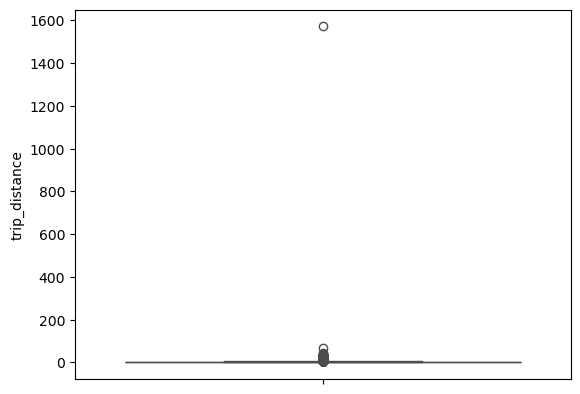

In [83]:
sns.boxplot(df["trip_distance"],color="blue")

<Axes: ylabel='trip_distance'>

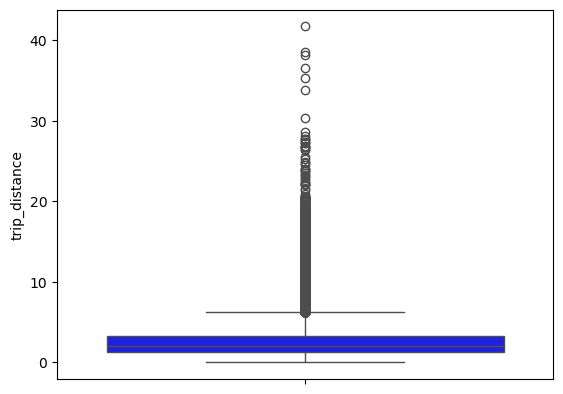

In [84]:
df=df[df["trip_distance"]<50]
sns.boxplot(df["trip_distance"],color="blue")

# Trip Duration

<Axes: ylabel='duration'>

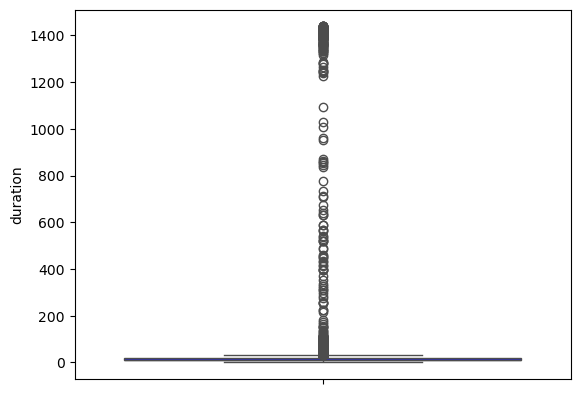

In [86]:
sns.boxplot(df["duration"],color="blue")

<Axes: ylabel='duration'>

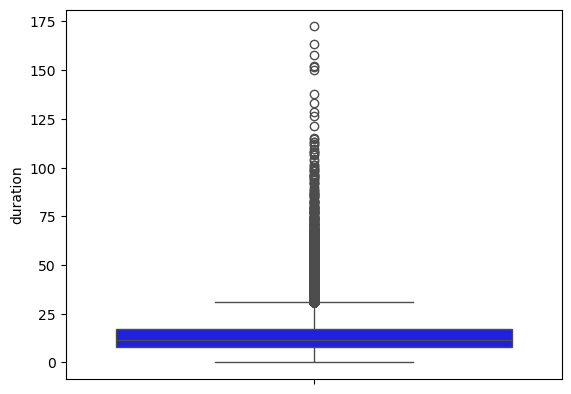

In [87]:
df=df[df["duration"]<180]
sns.boxplot(df["duration"],color="blue")

Selain itu, perjalanan dengan menggunakan taksi <2 menit sangat tidak umum dan biasanya menandakan ada kesalahan sistem ataupun perjalanan yang dibatalkan.

<Axes: ylabel='duration'>

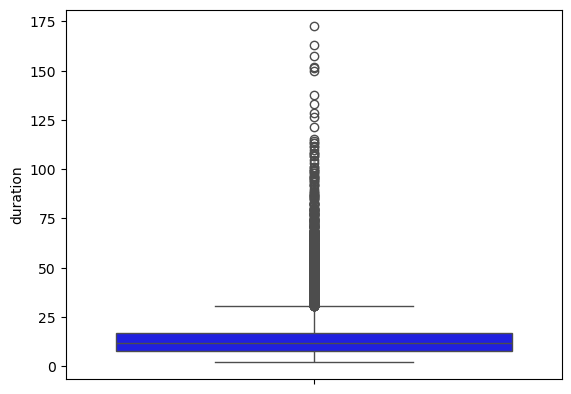

In [89]:
df=df[df["duration"]>2]
sns.boxplot(df["duration"],color="blue")

<Axes: ylabel='Total_amount_manual'>

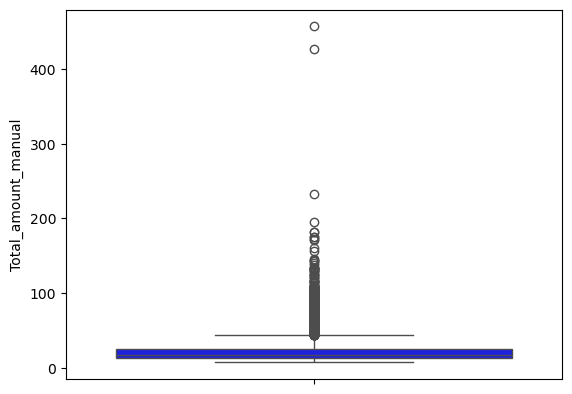

In [90]:
sns.boxplot(df["Total_amount_manual"],color="blue")

Terdapat beberapa data yang memiliki extrim outlier (>200 USD)

<Axes: ylabel='Total_amount_manual'>

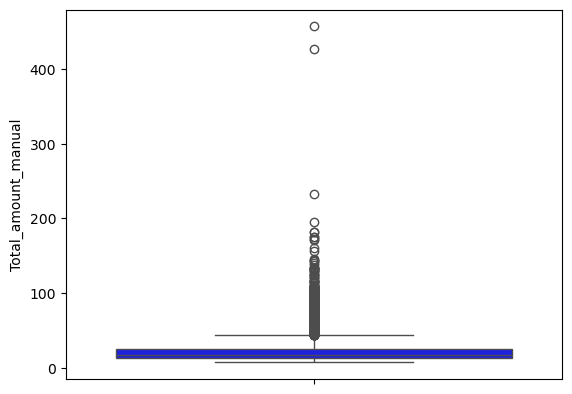

In [92]:
df[df["total_amount"]>200]
sns.boxplot(df["Total_amount_manual"],color="blue")

# Handle Contextual Outliers

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

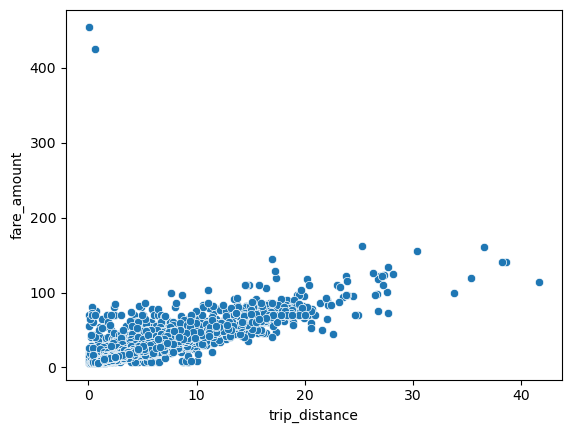

In [94]:
sns.scatterplot(df,y="fare_amount", x="trip_distance")

Dapat dilihat terdapat perjalanan dengan jarak yang kurang dari 5 mil namun memiliki fare_amount diatas 400 dollar. Data ini akan dihapus.

In [96]:
df = df[~((df["fare_amount"]>400) & (df["trip_distance"]<5))]

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

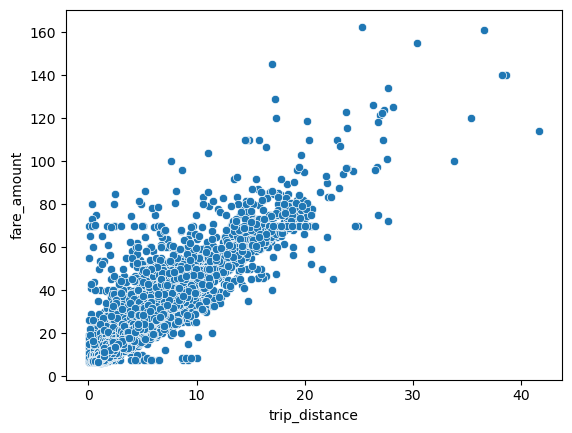

In [97]:
sns.scatterplot(df,y="fare_amount", x="trip_distance") 
#(Setelah hapus data outlier)

<Axes: xlabel='trip_distance', ylabel='duration'>

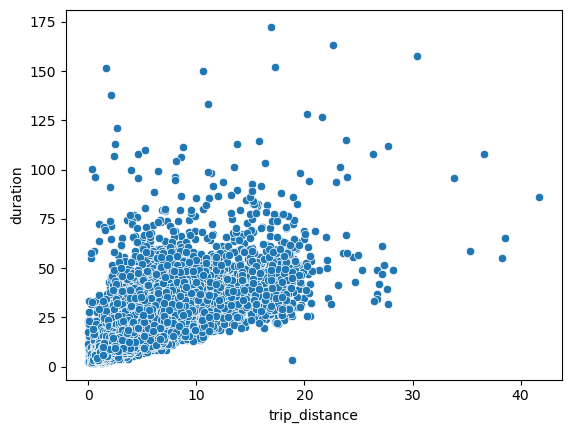

In [98]:
sns.scatterplot(df,y="duration", x="trip_distance")

In [99]:
# untuk handle bagian ini saya menambahkan kolom kecepatan
df['speed'] = df['trip_distance'] / (df['duration'] / 60)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend,Total_amount_manual,speed
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.00,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,True,24.18,14.047187
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.00,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,True,15.84,16.041359
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.50,0.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,True,10.20,13.402062
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.00,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone,17.55,Sunday,0,True,22.95,9.504274
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1.0,181,45,2.0,3.80,19.1,3.75,0.5,4.85,0.0,1.0,29.20,1.0,1.0,2.75,Brooklyn,Park Slope,Boro Zone,Manhattan,Chinatown,Yellow Zone,17.42,Sunday,0,True,31.95,13.088404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.00,0.5,2.00,0.0,1.0,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,False,18.50,20.676692
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.00,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,False,19.20,13.618605
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.00,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,False,14.16,13.953488
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.00,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,False,22.50,15.550892


In [100]:
# hapus data dengan kecepatan yang tidak normal
# batas kecepatan maksimal di NYC adalah 25-60 mph 
df = df[(df['speed'] <= 60)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend,Total_amount_manual,speed
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.00,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,True,24.18,14.047187
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.00,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,True,15.84,16.041359
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.50,0.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,True,10.20,13.402062
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.00,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone,17.55,Sunday,0,True,22.95,9.504274
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1.0,181,45,2.0,3.80,19.1,3.75,0.5,4.85,0.0,1.0,29.20,1.0,1.0,2.75,Brooklyn,Park Slope,Boro Zone,Manhattan,Chinatown,Yellow Zone,17.42,Sunday,0,True,31.95,13.088404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.00,0.5,2.00,0.0,1.0,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,False,18.50,20.676692
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.00,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,False,19.20,13.618605
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.00,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,False,14.16,13.953488
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.00,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,False,22.50,15.550892


<Axes: xlabel='fare_amount', ylabel='tip_amount'>

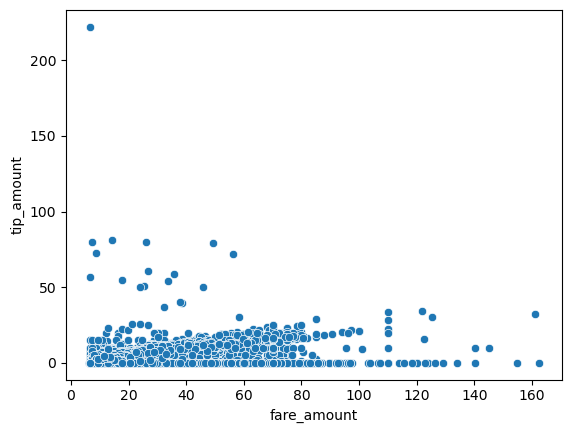

In [101]:
sns.scatterplot(df,y="tip_amount", x="fare_amount")

Rata-rata tip yang diberikan penumpang adalah sebesar 10-30% dari fare_amount. Saya akan hapus data dengan jumlah tip yang nilainya lebih besar dibandingkan fare_amount.

In [103]:
df = df[df['tip_amount'] < df['fare_amount']]

In [104]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend,Total_amount_manual,speed
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.00,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,True,24.18,14.047187
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.00,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,True,15.84,16.041359
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.50,0.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,True,10.20,13.402062
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.00,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone,17.55,Sunday,0,True,22.95,9.504274
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1.0,181,45,2.0,3.80,19.1,3.75,0.5,4.85,0.0,1.0,29.20,1.0,1.0,2.75,Brooklyn,Park Slope,Boro Zone,Manhattan,Chinatown,Yellow Zone,17.42,Sunday,0,True,31.95,13.088404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.00,0.5,2.00,0.0,1.0,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,False,18.50,20.676692
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.00,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,False,19.20,13.618605
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.00,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,False,14.16,13.953488
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.00,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,False,22.50,15.550892


<Axes: xlabel='fare_amount', ylabel='tip_amount'>

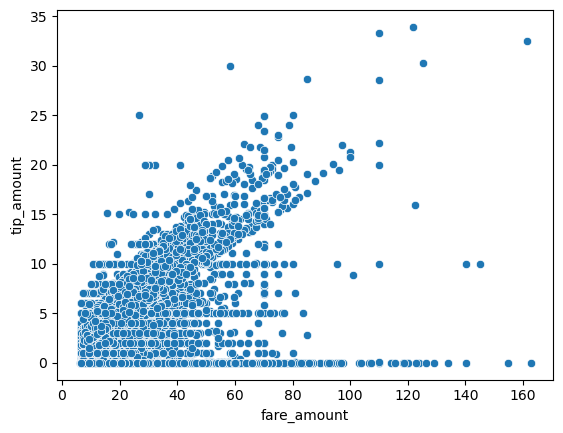

In [105]:
sns.scatterplot(df,y="tip_amount", x="fare_amount")

In [106]:
df.to_csv('NYC Data Clean.csv')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend,Total_amount_manual,speed
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.00,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,True,24.18,14.047187
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.00,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,True,15.84,16.041359
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.50,0.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,True,10.20,13.402062
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.00,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone,17.55,Sunday,0,True,22.95,9.504274
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1.0,181,45,2.0,3.80,19.1,3.75,0.5,4.85,0.0,1.0,29.20,1.0,1.0,2.75,Brooklyn,Park Slope,Boro Zone,Manhattan,Chinatown,Yellow Zone,17.42,Sunday,0,True,31.95,13.088404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.00,0.5,2.00,0.0,1.0,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,False,18.50,20.676692
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.00,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,False,19.20,13.618605
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.00,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,False,14.16,13.953488
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.00,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,False,22.50,15.550892


# Analysis

# 1. Optimasi Armada Taksi Berdasarkan Lokasi dan Waktu

In [109]:
trip_counts = df['hour'].value_counts().sort_index()

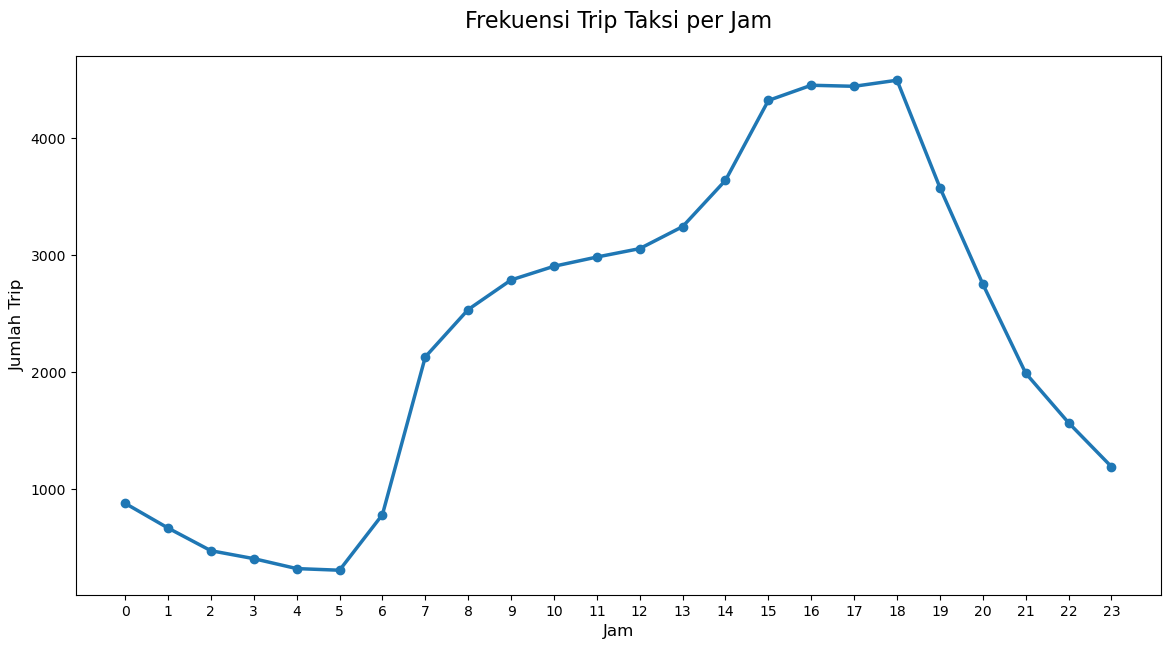

In [110]:
plt.figure(figsize=(14, 7))
plt.plot(trip_counts.index, trip_counts.values, marker='o', linewidth=2.5)
plt.title('Frekuensi Trip Taksi per Jam', fontsize=16, pad=20)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Trip', fontsize=12)
plt.xticks(range(0, 24))
plt.show()

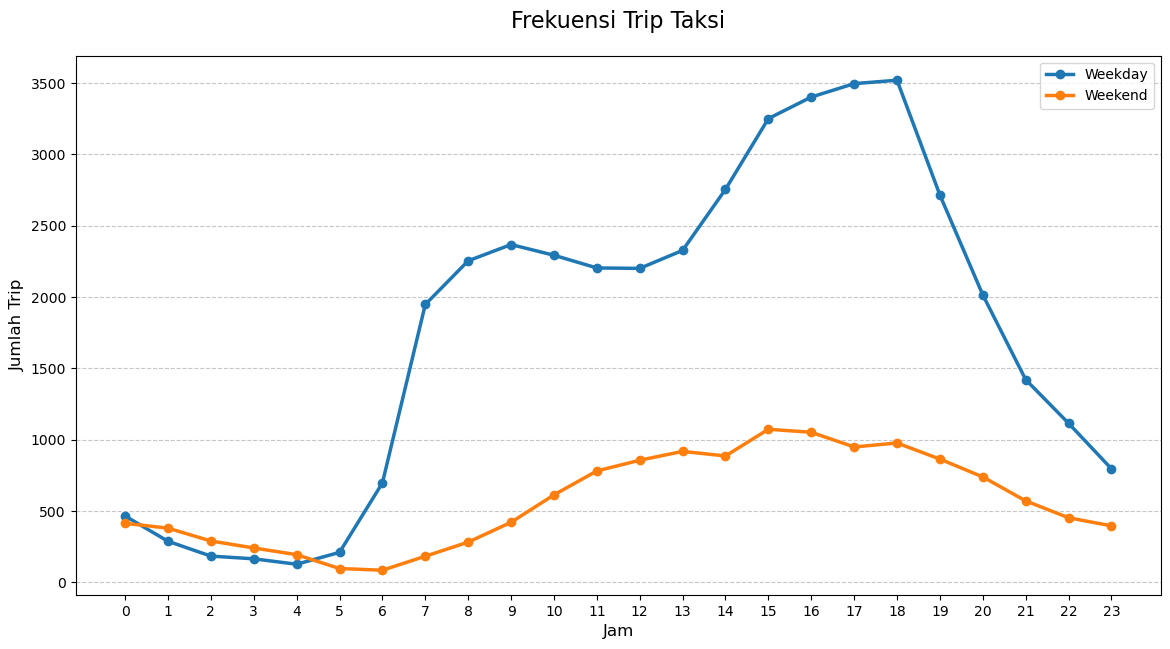

In [111]:
df['is_weekend'] = df['lpep_pickup_datetime'].dt.dayofweek >= 5
weekday = df[~df['is_weekend']]['hour'].value_counts().sort_index()
weekend = df[df['is_weekend']]['hour'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
plt.plot(weekday.index, weekday.values, label='Weekday',  marker='o', linewidth=2.5)
plt.plot(weekend.index, weekend.values, label='Weekend',  marker='o', linewidth=2.5)
plt.title('Frekuensi Trip Taksi', fontsize=16, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Trip', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.show()

Grafik di atas menunjukkan frekuensi trip di NYC adalah sebagai berikut:
1. Pada weekday (Senin-Jumat) : frekuensi trip taksi meningkat dari pukul 7 pagi hingga 7 malam
2. Pada weekday (Sabtu-Minggu) : frekuensi trip taksi meningkat dari pukul 10 pagi hingga 8 malam

In [113]:
df['is_weekend'] = np.where(df['is_weekend'], 'Weekend', 'Weekday')
df.to_csv('NYC Data Clean.csv')
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUService_Zone,DOBorough,DOZone,DOService_Zone,duration,day,hour,is_weekend,Total_amount_manual,speed
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.00,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,11.02,Sunday,0,Weekend,24.18,14.047187
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.00,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,6.77,Sunday,0,Weekend,15.84,16.041359
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.50,0.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,5.82,Sunday,0,Weekend,10.20,13.402062
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.00,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Yorkville East,Yellow Zone,17.55,Sunday,0,Weekend,22.95,9.504274
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1.0,181,45,2.0,3.80,19.1,3.75,0.5,4.85,0.0,1.0,29.20,1.0,1.0,2.75,Brooklyn,Park Slope,Boro Zone,Manhattan,Chinatown,Yellow Zone,17.42,Sunday,0,Weekend,31.95,13.088404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.00,0.5,2.00,0.0,1.0,17.30,1.0,2.0,0.00,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,7.98,Tuesday,23,Weekday,18.50,20.676692
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.00,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,10.75,Tuesday,23,Weekday,19.20,13.618605
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.00,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,6.02,Tuesday,23,Weekday,14.16,13.953488
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.00,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,9.53,Tuesday,23,Weekday,22.50,15.550892


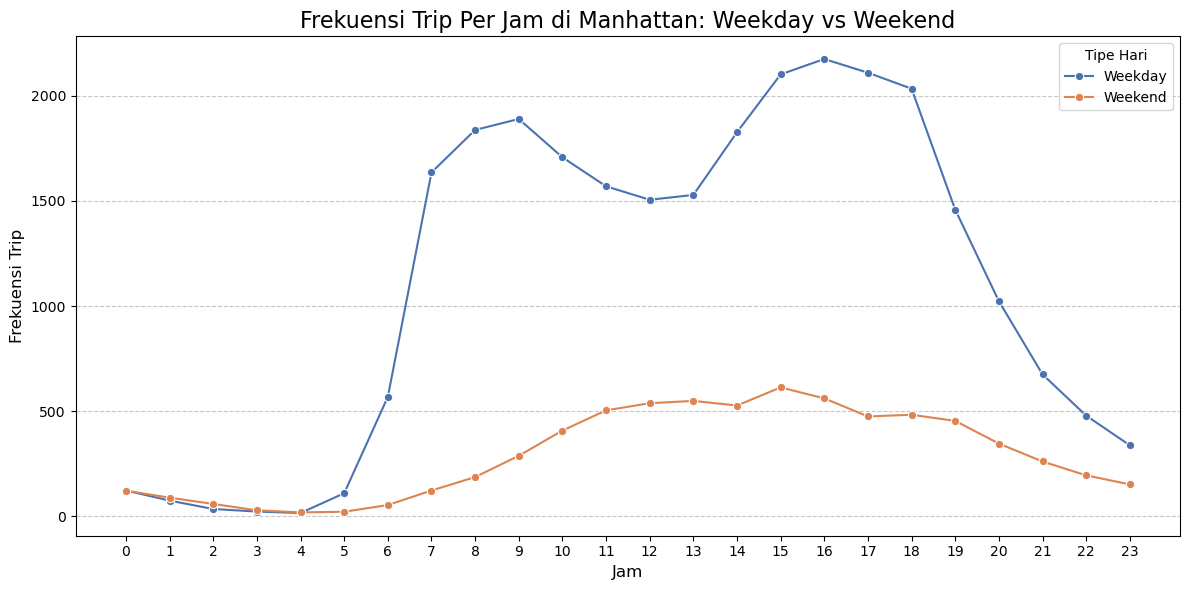

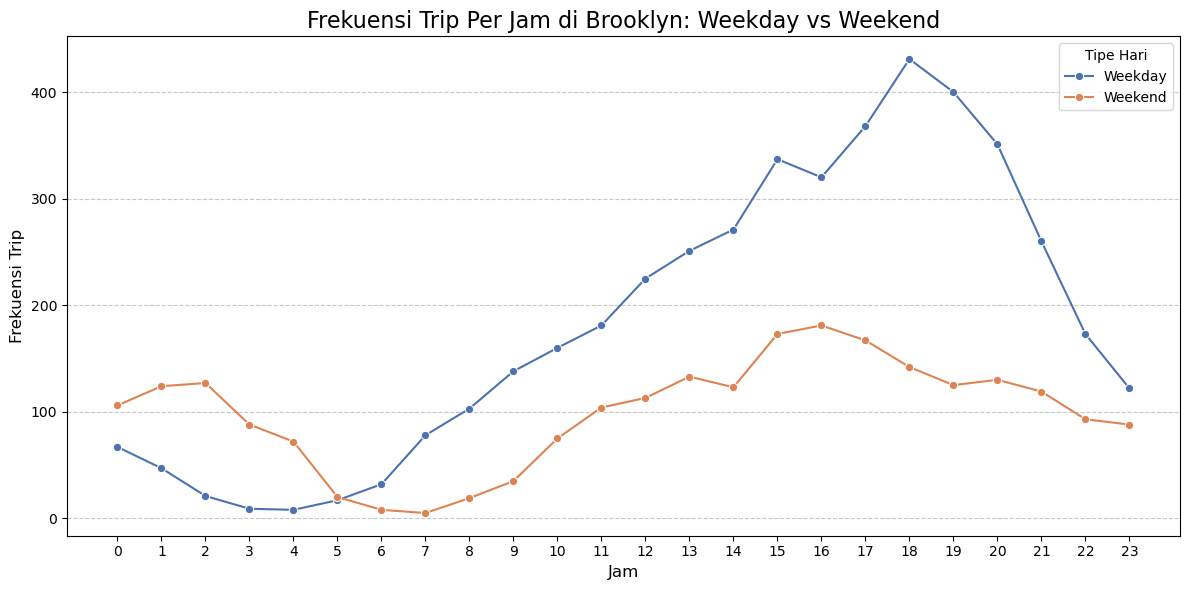

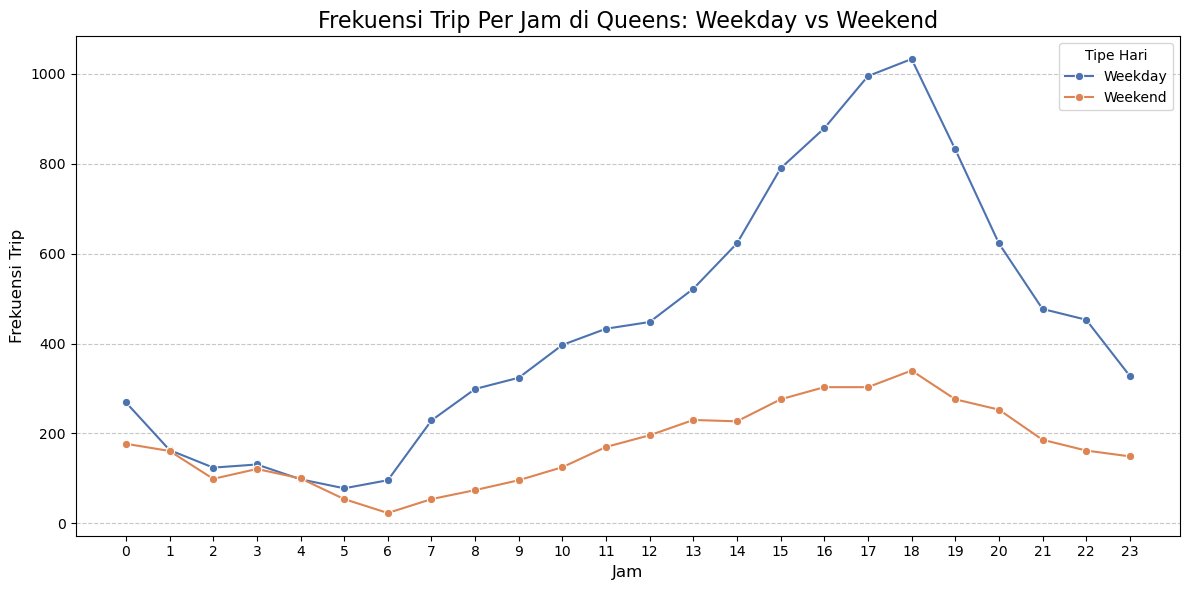

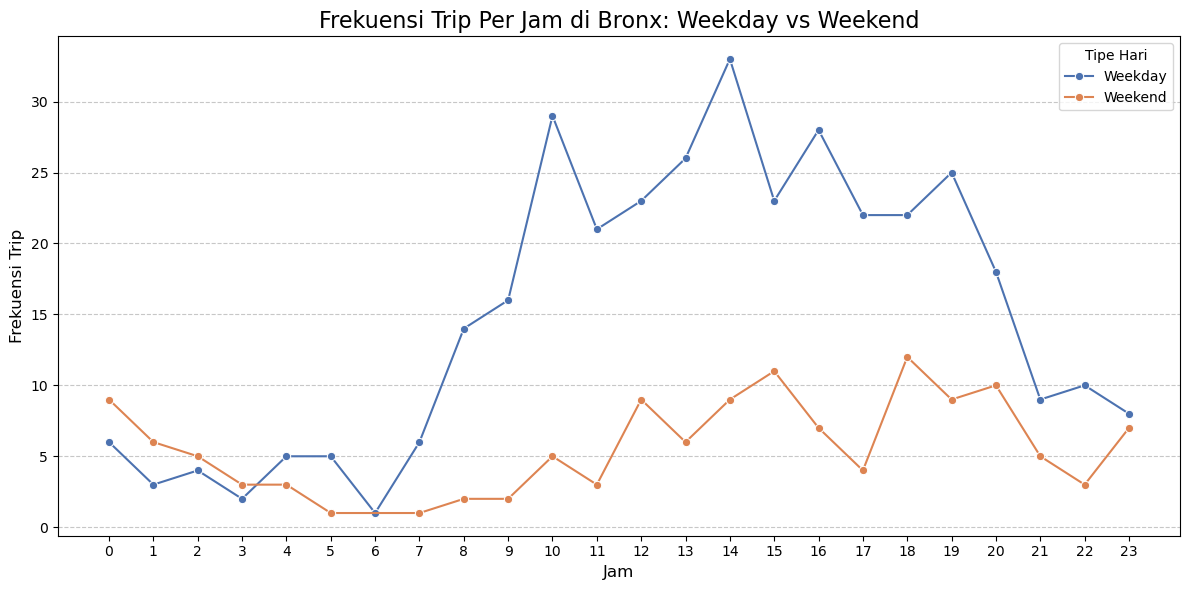

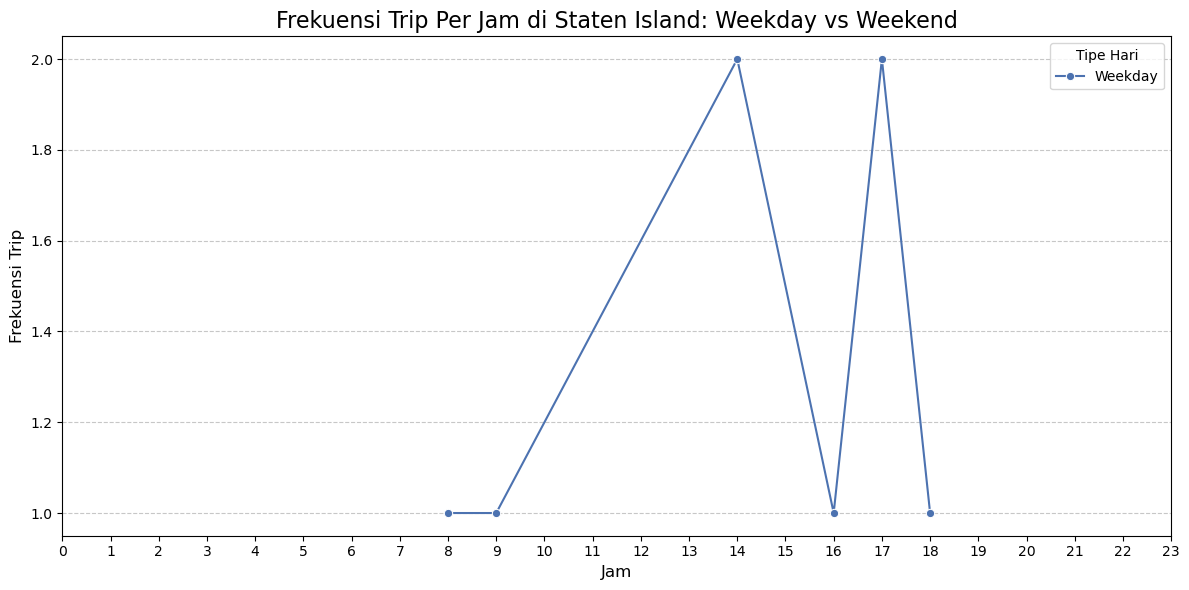

In [114]:
# Buat grafik per borough
for borough in df['PUBorough'].unique():
    borough_data = df[df['PUBorough'] == borough]
    hourly_trip_counts_borough = borough_data.groupby(['hour', 'is_weekend']).size().reset_index(name='trip_count')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=hourly_trip_counts_borough, x='hour', y='trip_count', hue='is_weekend', marker='o', palette='deep')
    plt.title(f"Frekuensi Trip Per Jam di {borough}: Weekday vs Weekend", fontsize=16)
    plt.xlabel("Jam", fontsize=12)
    plt.ylabel("Frekuensi Trip", fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Tipe Hari", loc="upper right")
    plt.tight_layout()
    plt.show()


**Insight:**

Berdasarkan grafik di atas, masing-masing borough memiliki waktu sibuk yang berbeda pada hari kerja (Weekday) dan akhir pekan (Weekend), sebagai berikut:

- **Manhattan** memiliki waktu sibuk pada **Weekday** antara **07:00-18:00** dan pada **Weekend** antara **11:00-19:00**, menunjukkan bahwa Manhattan memiliki frekuensi perjalanan yang tinggi lebih panjang pada hari kerja.
- **Brooklyn** memiliki waktu sibuk yang sama pada **Weekday** dan **Weekend**, yaitu pukul **15:00-20:00**, menunjukkan bahwa Brooklyn lebih sibuk pada sore hingga malam hari.
- **Queens** memiliki waktu sibuk pada **Weekday** antara **16:00-20:00** dan pada **Weekend** antara **15:00-20:00**, menunjukkan bahwa Queens lebih sibuk pada sore hingga malam hari
- **Bronx** menunjukkan waktu sibuk yang lebih panjang pada **Weekday**, yaitu antara **10:00-20:00**, sedangkan pada **Weekend**, waktu sibuk adalah antara **12:00-20:00**,  menunjukkan bahwa Bronx memiliki frekuensi perjalanan yang tinggi lebih panjang pada hari kerja
- **Staten Island** memiliki waktu sibuk yang lebih pendek yaitu pukul **14.00-17.00**

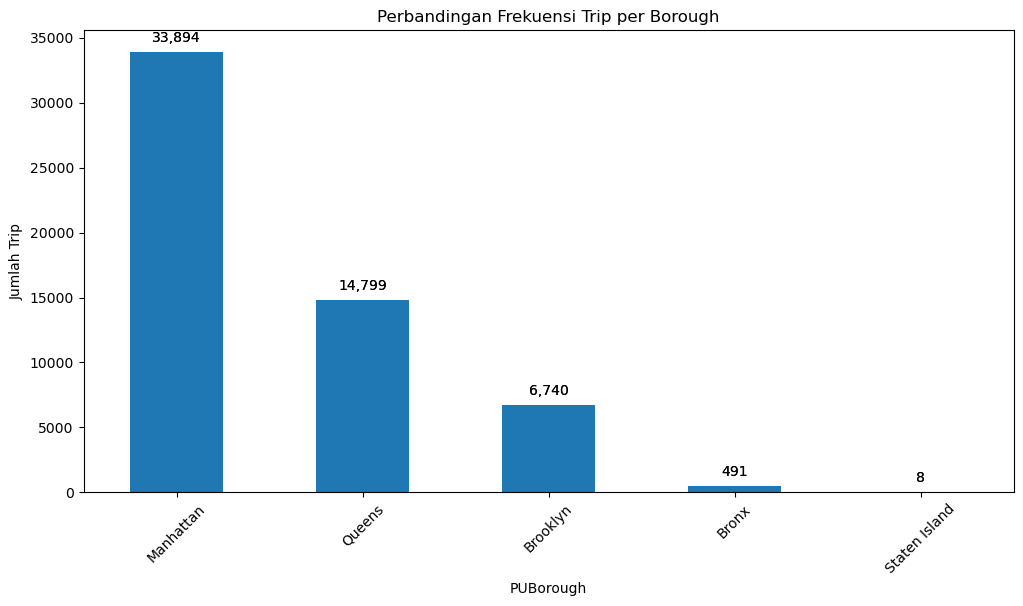

In [116]:
pickup_counts = df['PUBorough'].value_counts()
pickup_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Perbandingan Frekuensi Trip per Borough')
plt.ylabel('Jumlah Trip')
plt.xlabel('Borough')
ax = pickup_counts.plot(kind='bar', stacked=True) 
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=10)
plt.xticks(rotation=45)
plt.show()

**Insight:**

Dari data diatas menunjukkan ada perbedaan yang cukup signifikan pada frekuensi perjalanan taxi di NYC. Hal ini bisa disebabkan oleh beberapa hal, yaitu:

1. Manhattan : Pusat Ekonomi & Aktivitas Banyak perkantoran, hotel, restoran, dan tempat wisata. Volume lalu lintas orang yang sangat tinggi, terutama pada jam sibuk. Banyak penumpang menggunakan taksi untuk perjalanan singkat dalam kota.

2. Queens & Brooklyn = Kombinasi Pemukiman dan Komersial. Trip tetap cukup tinggi, terutama karena Queens punya bandara (JFK & LaGuardia). Brooklyn padat penduduk, tapi tidak setinggi Manhattan untuk aktivitas bisnis.

3. Bronx & Staten Island = Minim Aktivitas Taksi. Bronx lebih banyak area pemukiman, dan mungkin masyarakat lebih banyak pakai transportasi umum. Orang di Staten Island cenderung menggunakan mobil pribadi, bukan taksi.

4. Di borough luar Manhattan, sering kali digunakan kendaraan seperti Uber atau Lyft, yang mungkin tidak termasuk dalam dataset ini.

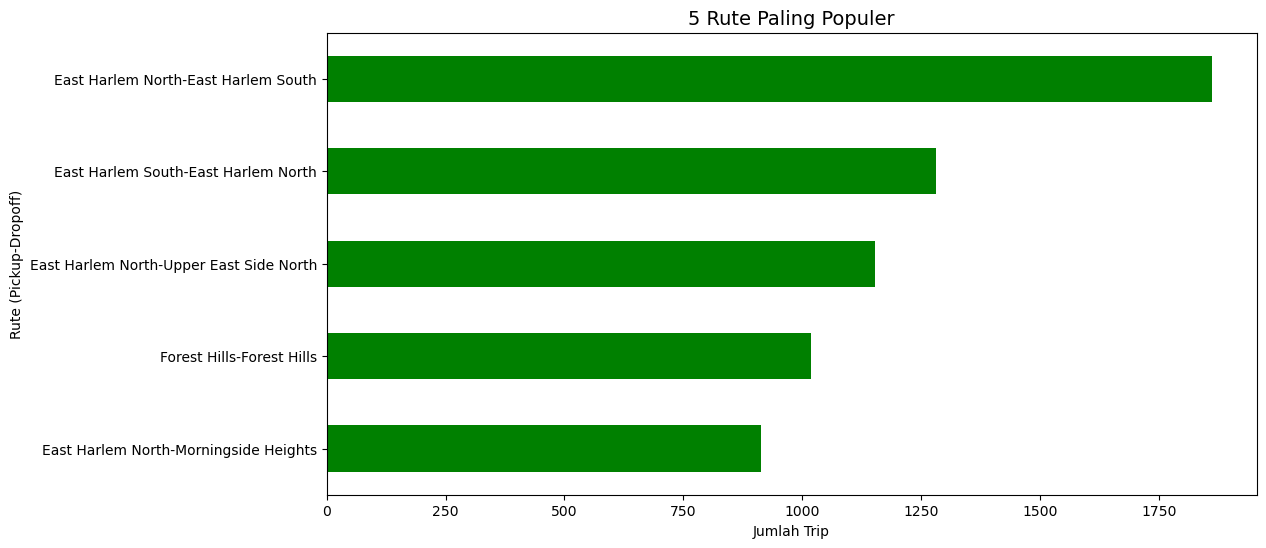

In [118]:
df['route'] = df['PUZone'].astype(str) + '-' + df['DOZone'].astype(str)
top_routes = df['route'].value_counts().head(5)

plt.figure(figsize=(12, 6))
top_routes.plot(kind='barh', color='green')
plt.title('5 Rute Paling Populer', fontsize=14)
plt.xlabel('Jumlah Trip')
plt.ylabel('Rute (Pickup-Dropoff)')
plt.gca().invert_yaxis()
plt.show()

**Insight**:

**East Harlem dan Upper East Side North** adalah area permukiman dengan banyak apartemen, banyak penduduk yang tidak memiliki mobil pribadi, ketergantungan tinggi pada transportasi publik dan taksi.

Rute seperti: `East Harlem South - East Harlem North`, `East Harlem North - Upper East Side North` menunjukkan aktivitas perjalanan dalam satu borough atau antar lingkungan tetangga. Ini termasuk rute pendek namun memiliki frekuensi yang tinggi, misalnya untuk ke stasiun subway, pasar, sekolah, atau rumah sakit.

**Forest Hills** adalah area dengan memiliki jalur subway utama (E, F, M, R), jalur **Long Island Rail Road (LIRR)**, dan banyak komuter dari dan ke Manhattan. Olehkarena itu, penduduk sering menggunakan green taxi untuk menjangkau titik transit utama dari trasnportasi umum.

Untuk East Harlem (North/South), Upper East Side, Morningside Heights merupakan borough Manhattan dan Forest Hills merupakan borough Queens.


# 2. Peningkatan Pendapatan Driver melalui Tip

In [121]:
# Untuk melihat hubungan variabel numerik dengan tip
numeric_cols = [
    'fare_amount', 'trip_distance', 'duration', 'total_amount',
    'passenger_count', 'speed', 'mta_tax'
]
corr_matrix = df[numeric_cols + ['tip_amount']].corr()
tip_corr = corr_matrix['tip_amount'].sort_values(ascending=False).reset_index()
tip_corr

,index,tip_amount
0,tip_amount,1.000000
1,total_amount,0.593083
2,fare_amount,0.397383
3,trip_distance,0.391846
4,duration,0.307180
5,speed,0.221118
6,passenger_count,0.025265
7,mta_tax,NaN


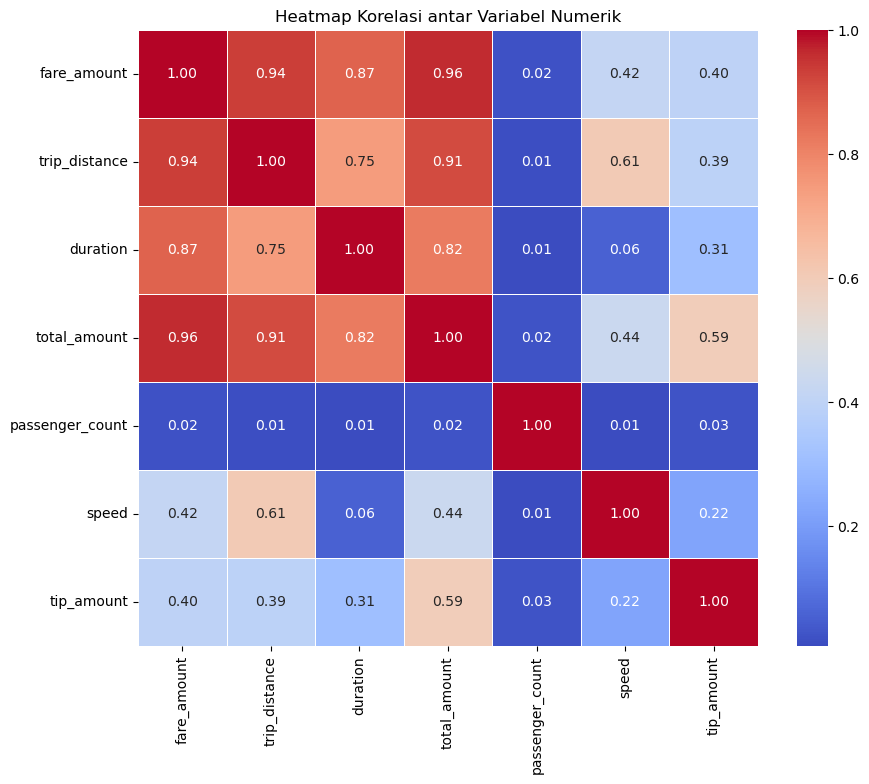

In [122]:
# Daftar kolom numerik
numeric_cols = [
    'fare_amount', 'trip_distance', 'duration', 'total_amount',
    'passenger_count', 'speed', 'tip_amount'
]

# Menghitung matriks korelasi
corr_matrix = df[numeric_cols].corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antar Variabel Numerik')
plt.show()


In [123]:
# Ubah korelasi matriks jadi format long (melted)
heatmap_data = corr_matrix.reset_index().melt(id_vars='index')
heatmap_data.columns = ['variable1', 'variable2', 'correlation']
heatmap_data.to_csv('heatmap_korelasi.csv', index=False)

**Insight**: 

Dari analisis diatas menunjukkan, bahwa tip cenderung meningkat seiring dengan kenaikan total biaya atau tarif dasar perjalanan. Hal ini memungkinkan terjadi karna pemberian tip untuk driver biasanya 10-20% dari tarif perjalanan

In [125]:
# Contoh: Uji ANOVA antara 'payment_type' dan 'tip_amount'
grouped_data = [df[df['payment_type'] == category]['tip_amount'] for category in df['payment_type'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

F-statistic: 34266.00, p-value: 0.0000


Nilai p-value < 0.05 (tingkat signifikansi umum), artinya ada perbedaan yang signifikan secara statistik dalam rata-rata tip antara metode pembayaran. Setelah itu, akan dianalisis jenis pembayaran apa yang memiliki rata-rata tips paling besar.

In [127]:
tip_analysis = df.groupby('payment_type')['tip_amount'].agg(['median', 'count'])
tip_analysis

,median,count
payment_type,,
1.0,2.98,36167
2.0,0.00,19765


In [128]:
tip_analysis.to_csv('tip_analysis.csv', index=False)

**Insight**: 

Dari hasil analisis di atas, penumpang yang melakukan pembayaran dengan credit card memberikan tip lebih banyak dibandingkan dengan penumpang yang membayar dengan cash.

In [130]:
# Contoh: Uji ANOVA antara 'trip_type' dan 'tip_amount'
grouped_data = [df[df['trip_type'] == category]['tip_amount'] for category in df['trip_type'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

F-statistic: 47.56, p-value: 0.0000


In [131]:
# Contoh: Uji ANOVA antara 'hour' dan 'tip_amount'
grouped_data = [df[df['hour'] == category]['tip_amount'] for category in df['hour'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

F-statistic: 5.76, p-value: 0.0000


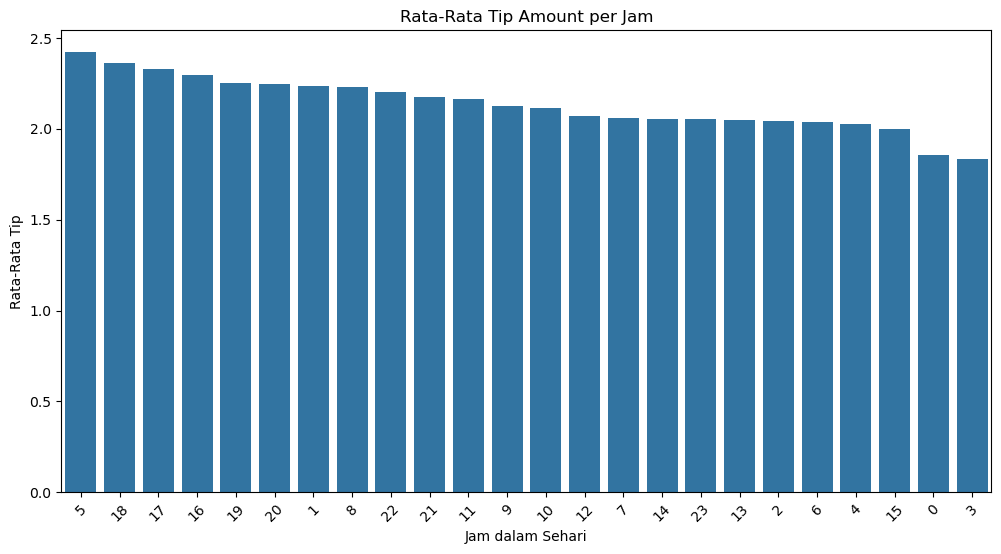

In [132]:
plt.figure(figsize=(12, 6))
hourly_tip = df.groupby('hour')['tip_amount'].mean().sort_values(ascending=False)
sns.barplot(x=hourly_tip.index, y=hourly_tip.values,order=hourly_tip.index, ci=None)
plt.title('Rata-Rata Tip Amount per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-Rata Tip')
plt.xticks(rotation=45)
plt.show()

**Insight**  :

- **Tip Tertinggi**:  
  - **Jam 18:00–23:00**:  
    - Penumpang cenderung memberi tip lebih besar karena:  
      - Perjalanan leisure (makan malam, nongkrong, pulang kerja).  
      - Faktor keamanan (penumpang lebih menghargai layanan di jam larut).  
  - **Jam 7:00–9:00**:  
    - Tip relatif tinggi, mungkin terkait perjalanan bisnis (karyawan yang expense tip).  

- **Tip Terendah**:  
  - **Jam 0:00–5:00**:  
    - Rata-rata tip sangat rendah, kemungkinan karena perjalanan pendek 
  - **Jam 12:00–15:00**:  
    - Tip stabil tetapi rendah, karena perjalanan rutin (belanja, antar-jemput).  

# Kesimpulan dan Rekomendasi

### **Kesimpulan Analisis Data Perjalanan Taksi**

#### **1. Pola Waktu Sibuk per Borough**
- **Weekday (Senin-Jumat)**  
  - Frekuensi trip tinggi: **07:00–19:00**  
  - **Manhattan**: Puncak **07:00–18:00** (terpanjang)  
  - **Bronx**: **10:00–20:00**  
  - **Queens**: **16:00–20:00**  
  - **Brooklyn & Staten Island**:  
    - Brooklyn: **15:00–20:00**  
    - Staten Island: **14:00–17:00** (terpendek)  

- **Weekend (Sabtu-Minggu)**  
  - Frekuensi trip tinggi: **10:00–20:00**  
  - **Manhattan**: **11:00–19:00**  
  - **Brooklyn, Queens, Bronx**: **15:00–20:00**  
  - **Staten Island**: Tidak ada data jelas, kecuali pola serupa Brooklyn/Queens.  

**Insight**:  
- Manhattan adalah pusat aktivitas terpadat, terutama pada hari kerja.  
- Brooklyn, Queens, dan Bronx lebih sibuk pada sore-malam hari, baik di weekday maupun weekend.  
- Staten Island memiliki permintaan terendah dan waktu sibuk singkat.  

---

#### **2. Volume Trip per Borough**  
1. **Manhattan**: 33,894 trip (*dominan*)  
2. **Brooklyn**: 14,799 trip  
3. **Queens**: 6,740 trip  
4. **Bronx**: 491 trip  
5. **Staten Island**: 8 trip (*paling rendah*)  

**Insight**:  
- 80%+ perjalanan terkonsentrasi di **Manhattan dan Brooklyn**.  
- **Prioritas optimasi armada** harus fokus pada dua borough ini.  

---

#### **3. Rute Paling Populer**  
1. **East Harlem North ↔ East Harlem South**
2. **East Harlem South ↔ East Harlem North**
3. **East Harlem North → Upper East Side North**
4. **Forest Hills (loop)**
5. **East Harlem North → Morningside Heights**

**Insight**:  
- Rute di **East Harlem** dan **Upper East Side** menjadi pusat permintaan tertinggi.  
- **Forest Hills** menunjukkan permintaan lokal yang signifikan (rute loop).


#### **3. Analisis Tip**

1. Kartu kredit menghasilkan tip lebih besar (median ~2.98 USD) dibanding tunai (median ~0.0 USD). Fitur tip otomatis pada pembayaran digital dan kebiasaan penumpang.

2.  Hubungan Tarif dan Tip: Tip cenderung meningkat seiring tarif perjalanan (biasanya 10-30% dari total biaya).

3.  Waktu perjalanan (jam) mempengaruhi besaran tip. Jam 18:00–23:00 adalah periode paling menguntungkan dengan tip rata-rata tertinggisan jam 0:00–5:00 merupakan periode dimana penumpang memberikan tip rendah.

---

### **Rekomendasi Strategis**  
1. **Alokasi Armada Dinamis**:  
   - Tambahkan lebih banyak taksi di **Manhattan (07:00–18:00 weekday)** dan **Brooklyn/Queens (15:00–20:00)**.  
   - Kurangi armada di Staten Island kecuali jam 14:00–17:00.  

2. **Dorong Pembayaran Non-Tunai**:
    - Gunakan fitur "tip suggestion" di aplikasi untuk meningkatkan tip dari kartu kredit.
    - Campaign pembayaran digital sebagai pembayaran yang lebih aman dan mudah

3. **Optimalkan Dynamic Pricing**:
   - Terapkan tarif dinamis pada waktu dan lokasi tertentu saat permintaan tinggi

4. **Fokus pada Trip Jam 18:00–23:00**:
   - Alokasikan lebih banyak driver di jam ini untuk manfaatkan peluang tip tinggi.  
